In [1]:
!pip install split-folders

In [2]:
import os
import shutil
import random
import splitfolders

In [3]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle

In [5]:
!cp /content/drive/MyDrive/Kaggle_Token/kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [01:11<00:00, 40.6MB/s]
100% 2.70G/2.70G [01:11<00:00, 40.5MB/s]


In [8]:
!unzip /content/new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [9]:
!kaggle datasets download -d aryashah2k/mango-leaf-disease-dataset

 97% 100M/103M [00:04<00:00, 34.4MB/s] 
100% 103M/103M [00:04<00:00, 25.4MB/s]


In [10]:
!unzip /content/mango-leaf-disease-dataset.zip -d /content/Mango

Archive:  /content/mango-leaf-disease-dataset.zip
  inflating: /content/Mango/Anthracnose/20211008_124249 (Custom).jpg  
  inflating: /content/Mango/Anthracnose/20211008_124250 (Custom).jpg  
  inflating: /content/Mango/Anthracnose/20211008_124252 (Custom).jpg  
  inflating: /content/Mango/Anthracnose/20211008_124253 (Custom).jpg  
  inflating: /content/Mango/Anthracnose/20211008_124256 (Custom).jpg  
  inflating: /content/Mango/Anthracnose/20211008_124301 (Custom).jpg  
  inflating: /content/Mango/Anthracnose/20211008_124302 (Custom).jpg  
  inflating: /content/Mango/Anthracnose/20211008_124305 (Custom).jpg  
  inflating: /content/Mango/Anthracnose/20211008_124306 (Custom).jpg  
  inflating: /content/Mango/Anthracnose/20211008_124310 (Custom).jpg  
  inflating: /content/Mango/Anthracnose/20211008_124312 (Custom).jpg  
  inflating: /content/Mango/Anthracnose/20211008_124334 (Custom).jpg  
  inflating: /content/Mango/Anthracnose/20211008_124336 (Custom).jpg  
  inflating: /content/Mango

In [11]:
input_folder = "/content/Mango"
output_folder = "/content/Split_folders"

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.8, 0.2))


Copying files: 4000 files [00:00, 5283.39 files/s]


In [12]:
source_dir1 = "/content/Split_folders/train"

# Destination directory
destination_dir1 = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"

# Copy all files and subdirectories recursively from source to destination
shutil.copytree(source_dir1, destination_dir1, dirs_exist_ok=True)

'/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

In [13]:
source_dir2 = "/content/Split_folders/val"

# Destination directory
destination_dir2 = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"

# Copy all files and subdirectories recursively from source to destination
shutil.copytree(source_dir2, destination_dir2, dirs_exist_ok=True)

'/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import numpy as np

In [16]:
train_dir = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"
val_dir = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [17]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 73495 files belonging to 46 classes.


In [46]:
class_names = training_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Mango__Anthracnose',
 'Mango__Bacterial_Canker',
 'Mango__Cutting_Weevil',
 'Mango__Die_Back',
 'Mango__Gall_Midge',
 'Mango__Healthy',
 'Mango__Powdery_Mildew',
 'Mango__Sooty_Mould',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawb

In [36]:
print("Class Names:", training_set.class_names)

Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Mango__Anthracnose', 'Mango__Bacterial_Canker', 'Mango__Cutting_Weevil', 'Mango__Die_Back', 'Mango__Gall_Midge', 'Mango__Healthy', 'Mango__Powdery_Mildew', 'Mango__Sooty_Mould', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Toma

In [18]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 18372 files belonging to 46 classes.


In [24]:
cnn = tf.keras.models.Sequential()

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=46,activation='softmax'))

In [26]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [28]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2297/2297 [==============================] - 170s 71ms/step - loss: 1.3881 - accuracy: 0.5929 - val_loss: 0.5417 - val_accuracy: 0.8309
Epoch 2/10
2297/2297 [==============================] - 159s 69ms/step - loss: 0.4588 - accuracy: 0.8549 - val_loss: 0.2649 - val_accuracy: 0.9142
Epoch 3/10
2297/2297 [==============================] - 160s 69ms/step - loss: 0.2780 - accuracy: 0.9105 - val_loss: 0.2208 - val_accuracy: 0.9291
Epoch 4/10
2297/2297 [==============================] - 163s 71ms/step - loss: 0.1863 - accuracy: 0.9397 - val_loss: 0.1530 - val_accuracy: 0.9508
Epoch 5/10
2297/2297 [==============================] - 159s 69ms/step - loss: 0.1402 - accuracy: 0.9538 - val_loss: 0.1382 - val_accuracy: 0.9551
Epoch 6/10
2297/2297 [==============================] - 159s 69ms/step - loss: 0.1111 - accuracy: 0.9638 - val_loss: 0.1462 - val_accuracy: 0.9538
Epoch 7/10
2297/2297 [==============================] - 159s 69ms/step - loss: 0.0894 - accuracy: 0.9705 - val_loss: 0

In [29]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2297/2297 [==============================] - 52s 22ms/step - loss: 0.0496 - accuracy: 0.9835
Training accuracy: 0.9835498929023743


In [30]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

575/575 [==============================] - 13s 22ms/step - loss: 0.1487 - accuracy: 0.9560
Validation accuracy: 0.9560200572013855


In [31]:
cnn.save('trained_plant_disease_model.keras')

In [32]:
training_history.history

{'loss': [1.388097882270813,
  0.4588199555873871,
  0.2779562175273895,
  0.18633662164211273,
  0.1402401626110077,
  0.11113517731428146,
  0.08940678089857101,
  0.07599914819002151,
  0.06568701565265656,
  0.056694477796554565],
 'accuracy': [0.5928974747657776,
  0.8549153208732605,
  0.9105381369590759,
  0.9397101998329163,
  0.9538335800170898,
  0.9637934565544128,
  0.9704877734184265,
  0.9756990075111389,
  0.9788693189620972,
  0.9816449880599976],
 'val_loss': [0.5417388081550598,
  0.26486003398895264,
  0.2208329737186432,
  0.1529926061630249,
  0.13819365203380585,
  0.14619816839694977,
  0.1612827479839325,
  0.12500452995300293,
  0.11526641249656677,
  0.14869165420532227],
 'val_accuracy': [0.8308839797973633,
  0.9142172932624817,
  0.929131269454956,
  0.9507946968078613,
  0.9551491141319275,
  0.95384281873703,
  0.9532985091209412,
  0.9618985652923584,
  0.9652187824249268,
  0.9560200572013855]}

In [33]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [34]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


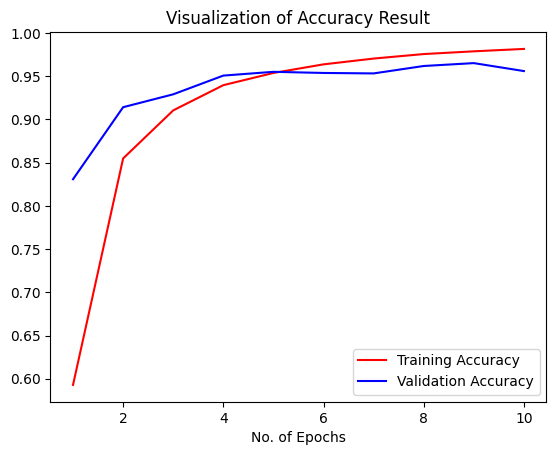

In [35]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [38]:
model = tf.keras.models.load_model('trained_plant_disease_model.keras')

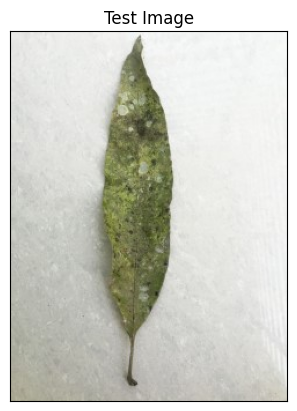

In [39]:
import cv2
image_path = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Mango__Sooty_Mould/IMG_20211108_120804 (Custom).jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [41]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 1s 720ms/step


In [42]:
print(predictions)

[[9.9795436e-11 4.7655369e-13 4.7969628e-09 2.5347018e-09 9.5113695e-10
  3.7174525e-10 1.2839369e-12 5.2191571e-12 3.4454468e-14 2.8897029e-11
  4.9941442e-13 1.2194079e-13 3.5463467e-13 1.1003529e-11 7.6456907e-14
  1.4553602e-12 2.1099854e-08 2.2213232e-12 2.7202327e-11 4.3962982e-07
  1.0129205e-09 1.4228197e-05 9.9998486e-01 1.4789669e-12 3.4047627e-09
  3.9289355e-07 6.1736060e-13 1.4184386e-10 1.4113962e-12 4.4522914e-13
  4.5089069e-10 2.1727562e-09 2.9823832e-10 1.0696792e-10 8.5811414e-11
  1.3175573e-12 1.5415733e-09 3.4977878e-11 1.9191566e-08 3.0109484e-11
  5.5834670e-09 8.4467580e-09 1.2075145e-08 8.0642298e-12 6.4394632e-09
  8.2296667e-09]]


In [43]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

22


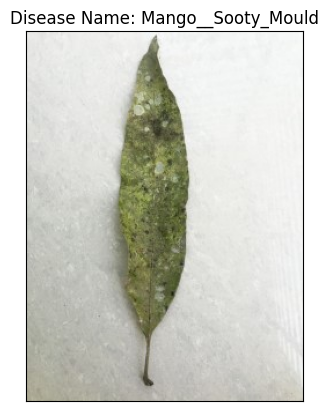

In [47]:
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()